# Amirhossein Mesbah - Part 1

# 1.Spike Preprocessing: Sorting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io as spio
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import glob

## Reading data

In [2]:
# Read Data
spike_data = spio.loadmat('extracellular.mat')
spike_data = spike_data['all_data_with_noise_and_line']

spikes_label = spio.loadmat('spikes.mat')
spikes_label = spikes_label['SpikeInds']


## 1.1 Getting Started

### amplitude against time

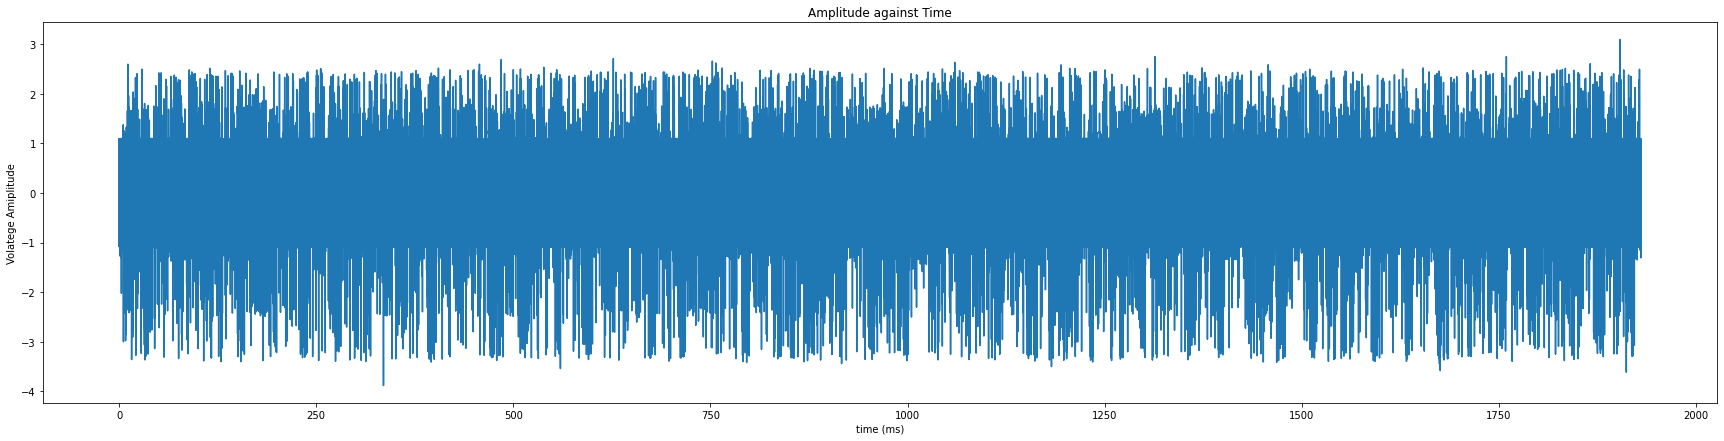

In [3]:
record_time = spike_data.shape[1]/2400
plt.figure(figsize=(30, 7))
plt.plot(np.linspace(0, record_time, len(spike_data[0])), spike_data[0])
plt.xlabel("time (ms)")
plt.ylabel("Volatege Amiplitude")
plt.title("Amplitude against Time")
plt.show()

### histogram of the recorded voltage amplitudes for the entire dataset

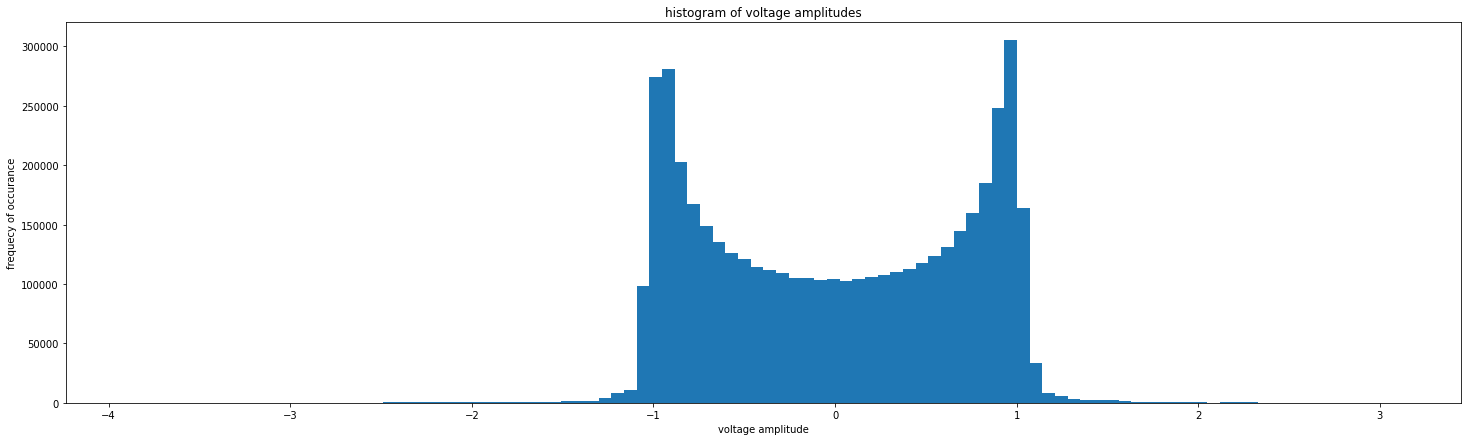

In [4]:
plt.figure(figsize=(25, 7))
plt.hist(spike_data[0], bins=100)
plt.title("histogram of voltage amplitudes");
plt.xlabel("voltage amplitude")
plt.ylabel("frequecy of occurance")
plt.show()


## 1.2 Filtering the Data

In [5]:
F = 300
fs = 2400
b, a = signal.butter(7, F/fs, btype='high')
y = signal.filtfilt(b, a, spike_data[0])

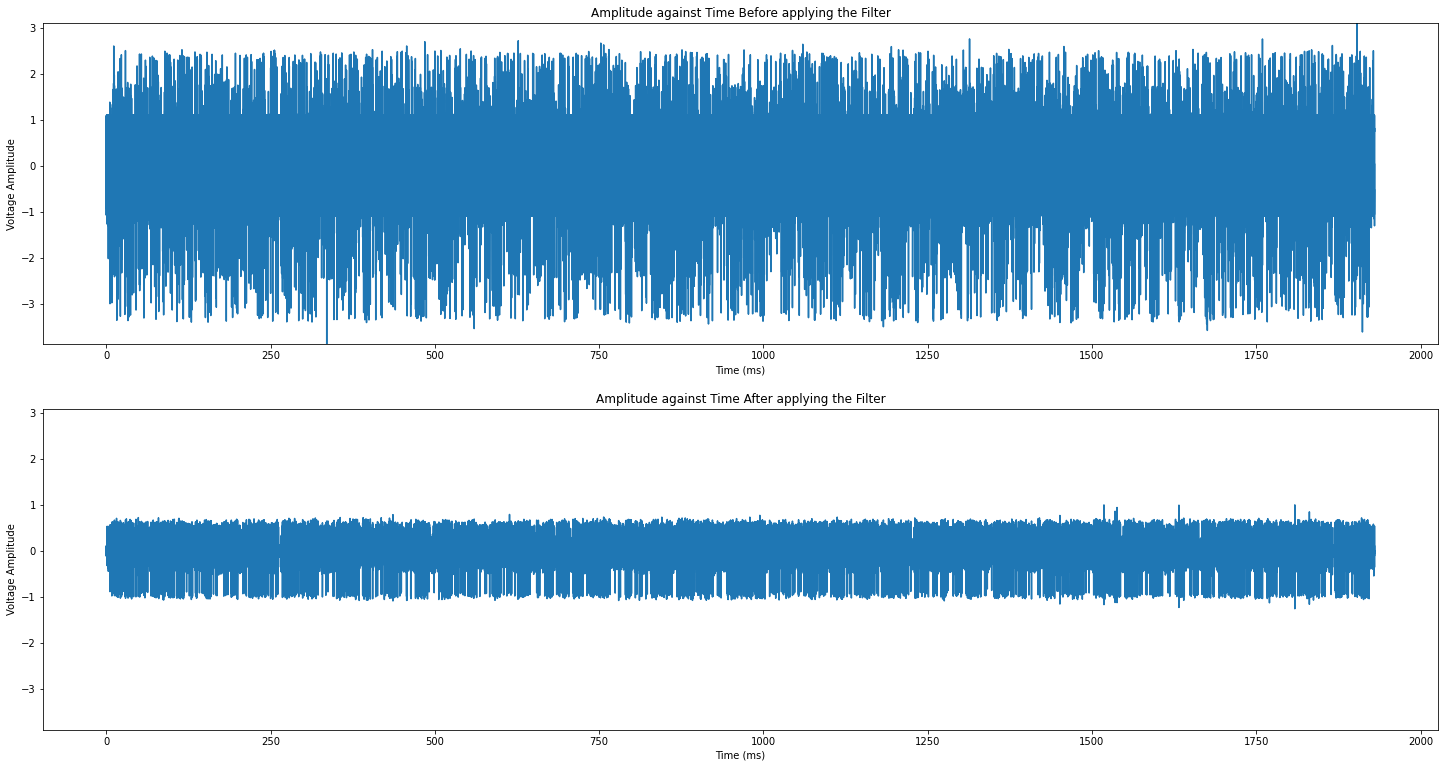

In [6]:
plt.figure(figsize=(25, 13))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, record_time, len(spike_data[0])), spike_data[0])
plt.ylim(np.min(spike_data[0]), np.max(spike_data[0]))
plt.ylabel("Voltage Amplitude")
plt.title("Amplitude against Time Before applying the Filter")
plt.xlabel("Time (ms)")


plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, record_time, len(spike_data[0])), y)
plt.ylim(np.min(spike_data[0]), np.max(spike_data[0]))
plt.ylabel("Voltage Amplitude")
plt.xlabel("Time (ms)")
plt.title("Amplitude against Time After applying the Filter")

plt.show()

## 1.3 Detecting the Spike

### calculate the voltage threshold (𝜃)

In [7]:
sigma = np.median(np.abs(y)/ 0.6745);
threshold = 5 * sigma
print(threshold)

0.24112208411417452


### Extract peaks and select Spikes

In [54]:
diff_signal = np.diff(y)
spike_indexes = []
detected_spikes = []
real_spike_indexes = []
for i in range(1, len(diff_signal)- 1):
    if np.sign(diff_signal[i-1]) * np.sign(diff_signal[i+1])<0:
        if y[i] >= threshold:
            detected_spikes.append(i+1)
            spike_indexes.append(y[i-5 : i + 5])
    
    if i in spikes_label[0]:
        real_spike_indexes.append(y[i-5 : i + 5])
        

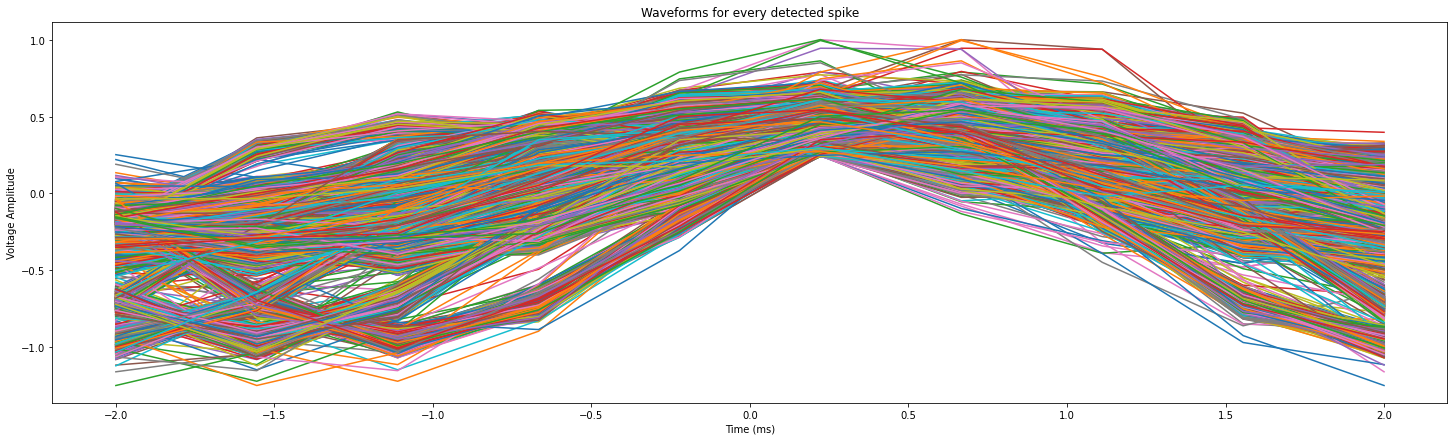

In [55]:
plt.figure(figsize=(25, 7))
for spike in spike_indexes:
    plt.plot(np.linspace(-2,2, len(spike)), spike)

plt.xlabel("Time (ms)")
plt.ylabel("Voltage Amplitude")
plt.title("Waveforms for every detected spike")
plt.show()

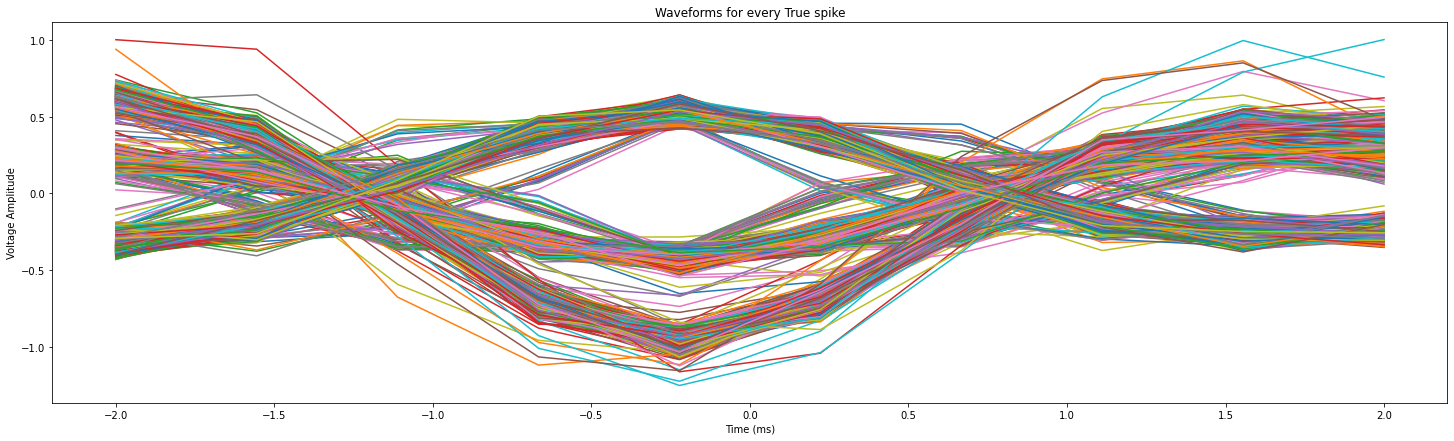

In [56]:
plt.figure(figsize=(25, 7))
for spike in real_spike_indexes:
    plt.plot(np.linspace(-2,2, len(spike)), spike)

plt.xlabel("Time (ms)")
plt.ylabel("Voltage Amplitude")
plt.title("Waveforms for every True spike")
plt.show()

## 1.4 Extracting Features

In [29]:
pca = PCA(n_components = 3)
pca_spike_indexes = pca.fit_transform(spike_indexes)

## 1.5 Clustering the Spikes

### K = 4

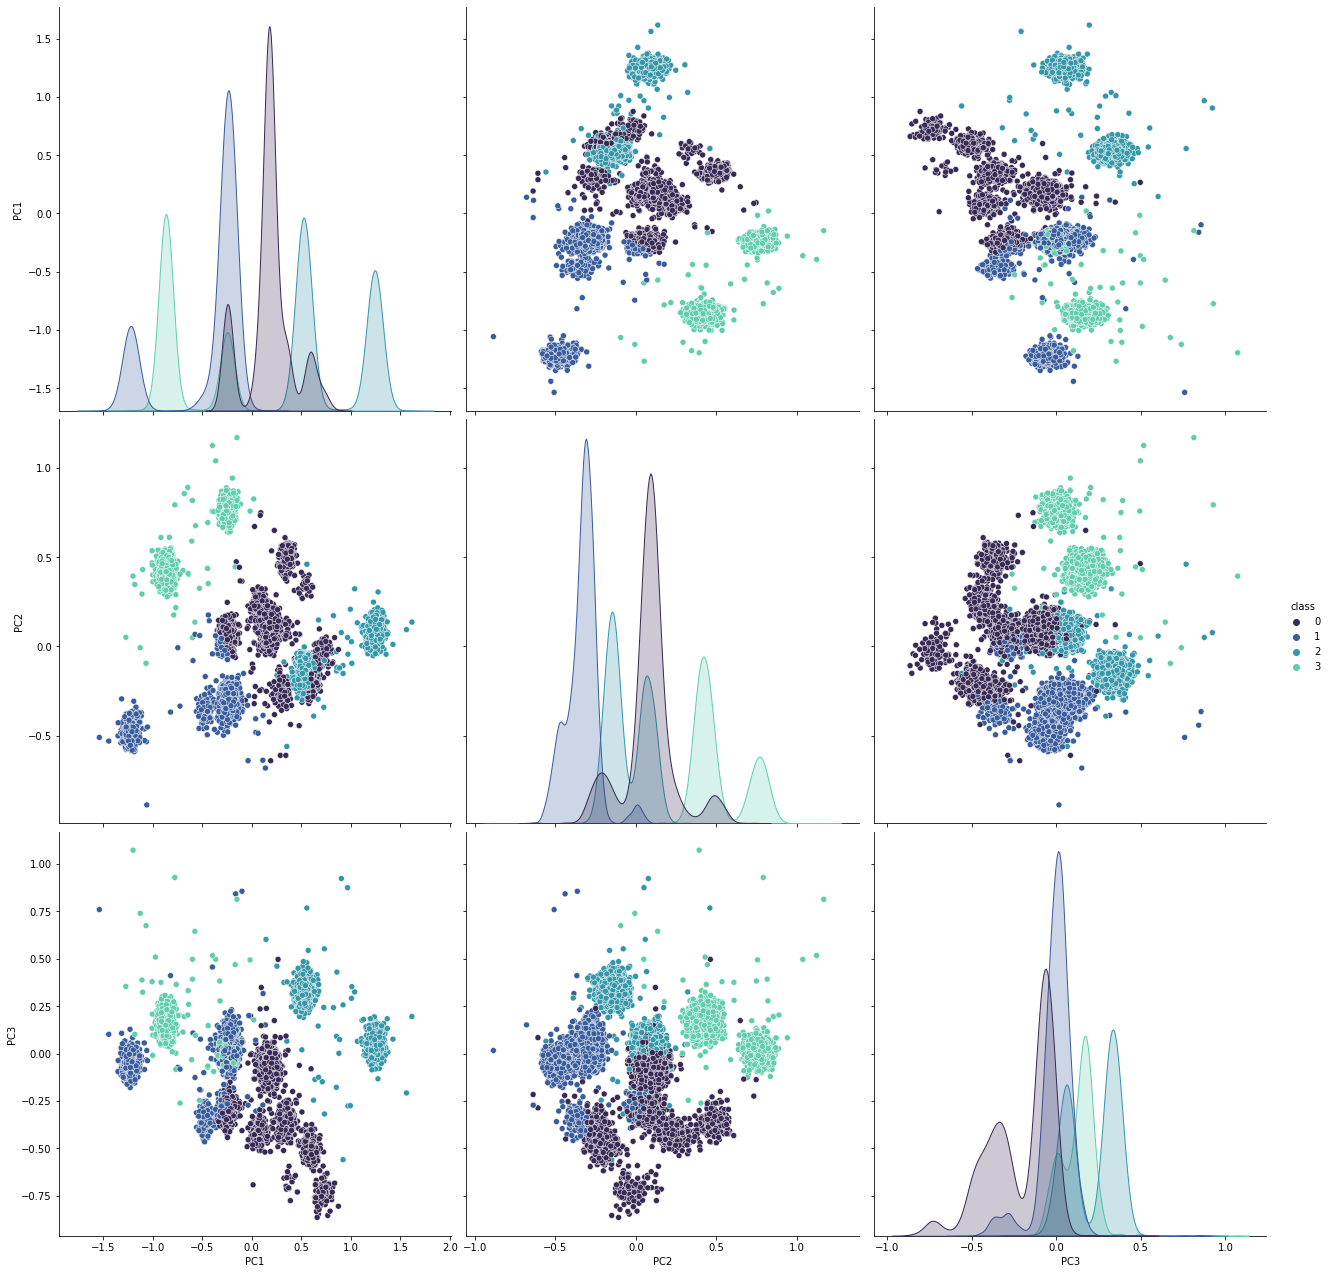

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_spike_indexes)
y_kmeans = kmeans.predict(pca_spike_indexes)
df = pd.DataFrame(pca_spike_indexes)
df.columns = ['PC1', 'PC2', 'PC3']
df['class']= y_kmeans
sns.pairplot(df, hue='class',  height=6, palette=sns.color_palette('mako', n_colors=4));

### k = 3

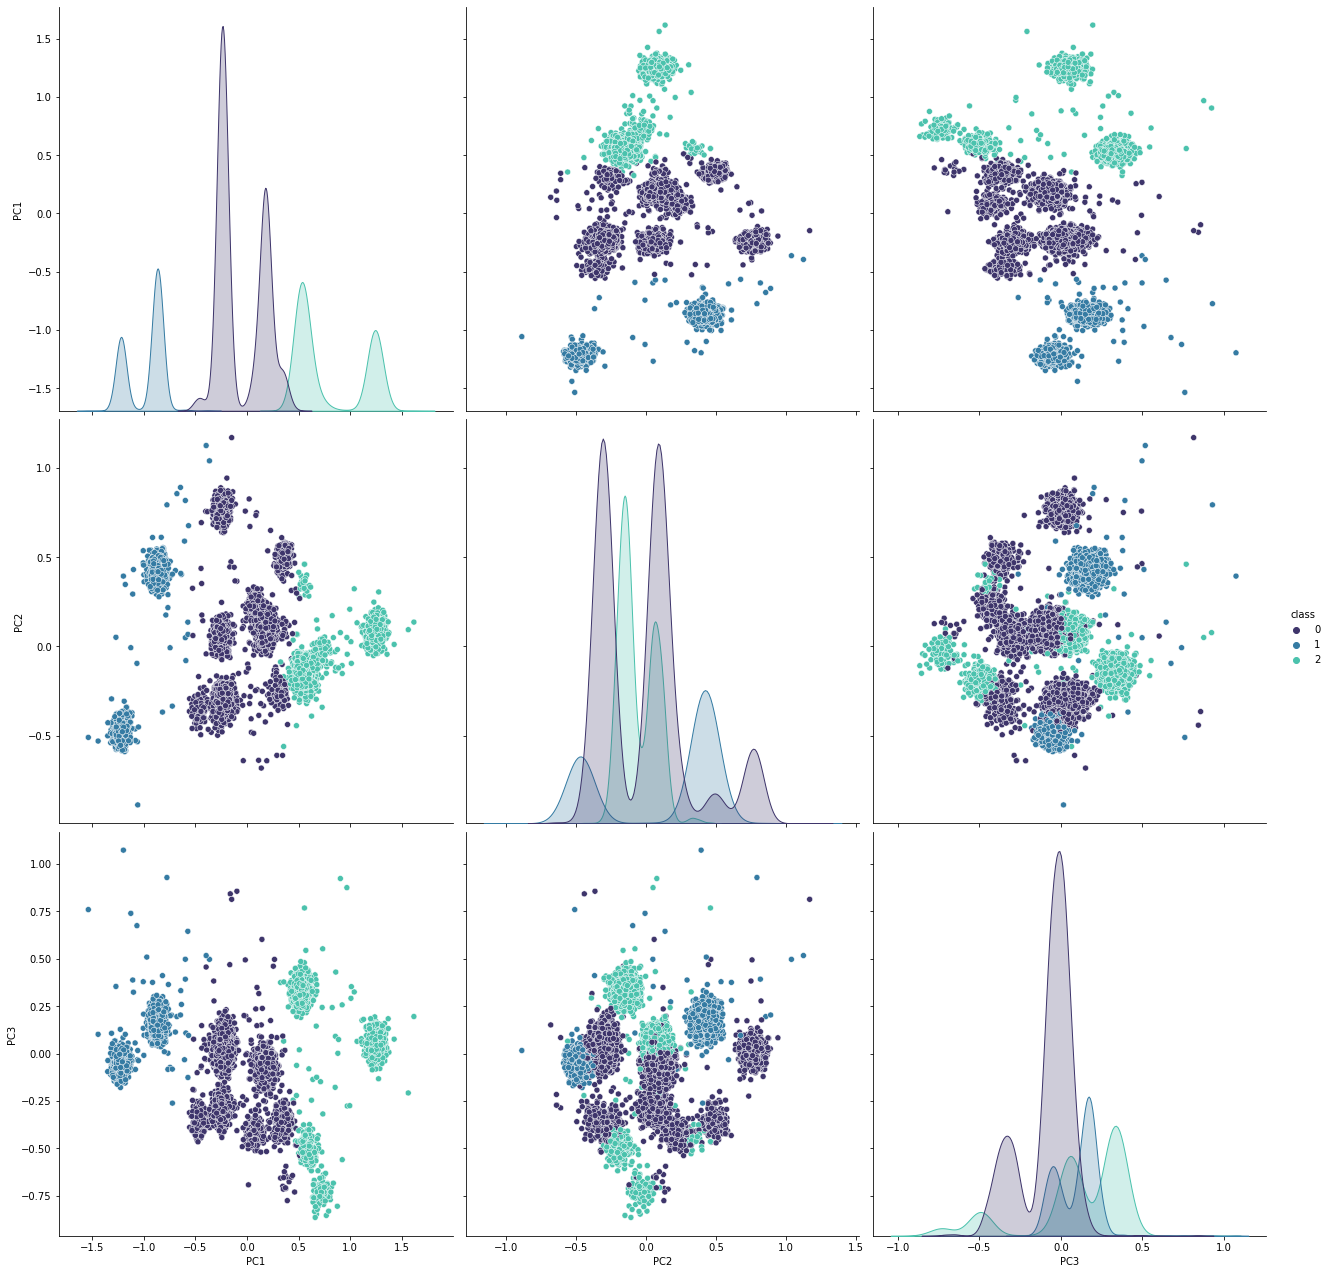

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_spike_indexes)
y_kmeans = kmeans.predict(pca_spike_indexes)
df = pd.DataFrame(pca_spike_indexes)
df.columns = ['PC1', 'PC2', 'PC3']
df['class']= y_kmeans
sns.pairplot(df, hue='class',  height=6, palette=sns.color_palette('mako', n_colors=3));

### k = 6

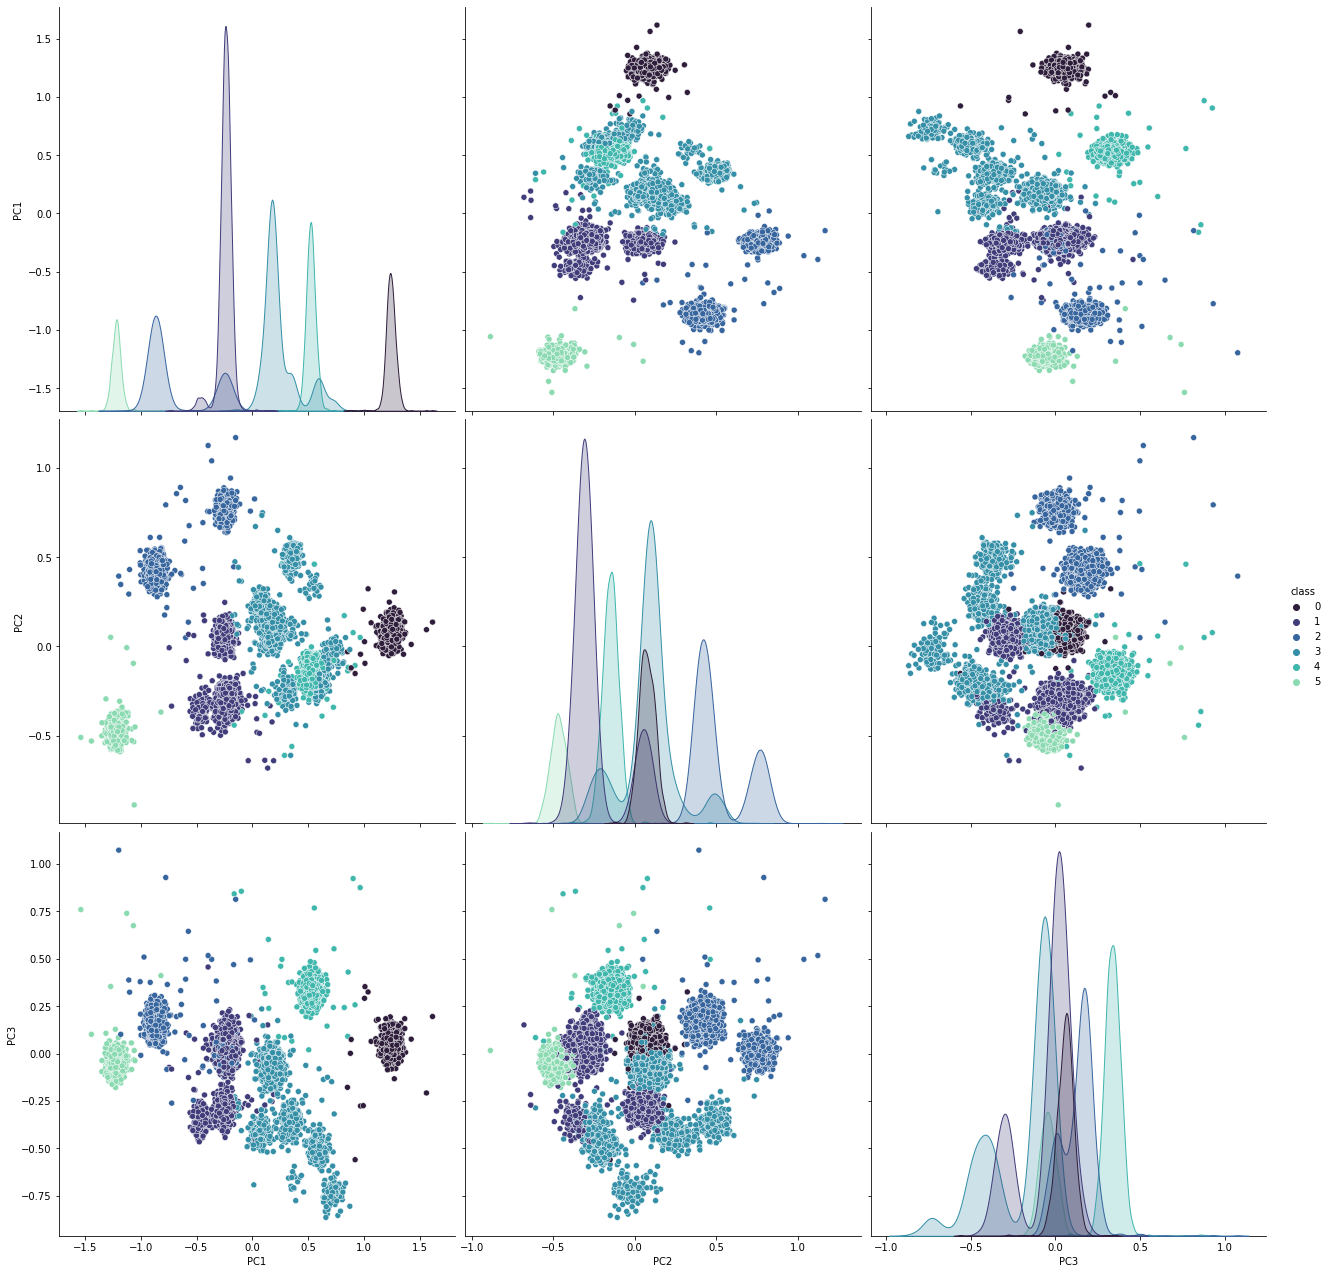

In [57]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(pca_spike_indexes)
y_kmeans = kmeans.predict(pca_spike_indexes)
df = pd.DataFrame(pca_spike_indexes)
df.columns = ['PC1', 'PC2', 'PC3']
df['class']= y_kmeans
sns.pairplot(df, hue='class',  height=6, palette=sns.color_palette('mako', n_colors=k));

### k = 10

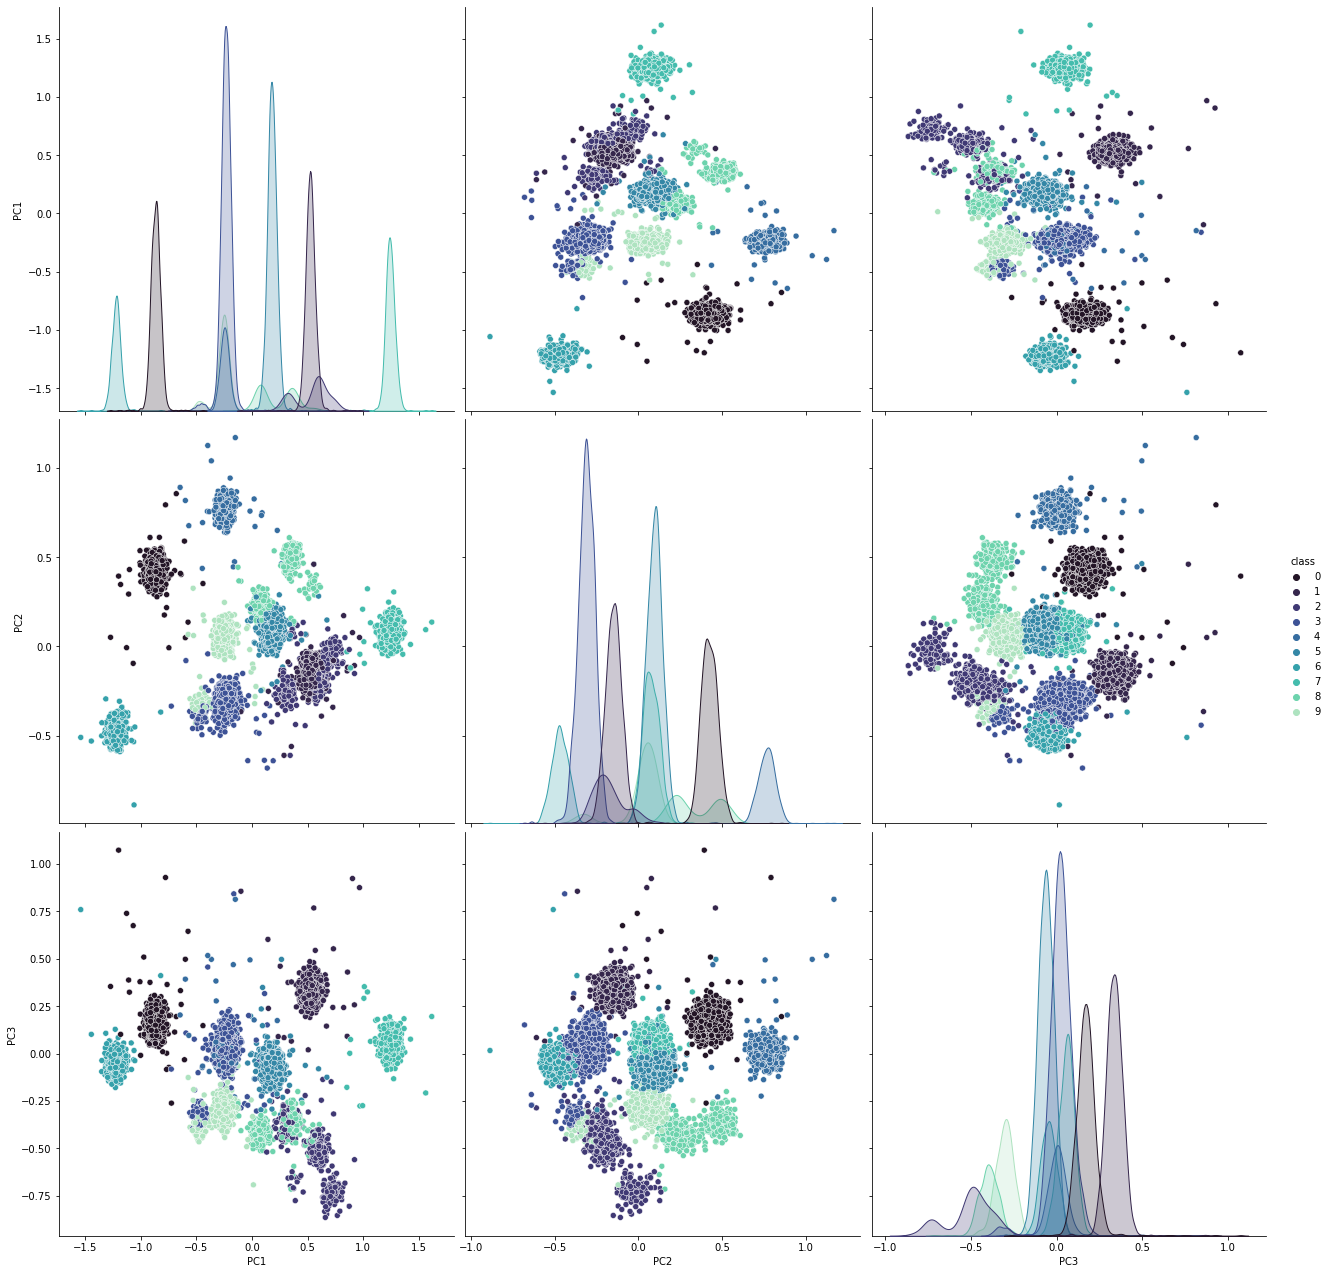

In [38]:

k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(pca_spike_indexes)
y_kmeans = kmeans.predict(pca_spike_indexes)
df = pd.DataFrame(pca_spike_indexes)
df.columns = ['PC1', 'PC2', 'PC3']
df['class']= y_kmeans
sns.pairplot(df, hue='class',  height=6, palette=sns.color_palette('mako', n_colors=k));

## Evaluation

In [15]:

counter = 0 
for s in  detected_spikes:
    if s in spikes_label[0]:
        counter +=1
print(counter / len(spikes_label[0]))

0.4371207365557648


In [44]:
conf_matrix =[[0, 0],[0, 0]]
for i in  range(len(y)):
    if (i+1)%100000 == 0:
        print(i)
    if i in detected_spikes and i in spikes_label[0]:
        conf_matrix[1][1] +=1
    elif i not in detected_spikes and i not in spikes_label[0]:
        conf_matrix[0][0] +=1
    elif i not in detected_spikes and i in spikes_label[0]:
        conf_matrix[0][1] +=1
    elif i in detected_spikes and i not in spikes_label[0]:
        conf_matrix[1][0] +=1
        

99999
199999
299999
399999
499999
599999
699999
799999
899999
999999
1099999
1199999
1299999
1399999
1499999
1599999
1699999
1799999
1899999
1999999
2099999
2199999
2299999
2399999
2499999
2599999
2699999
2799999
2899999
2999999
3099999
3199999
3299999
3399999
3499999
3599999
3699999
3799999
3899999
3999999
4099999
4199999
4299999
4399999
4499999
4599999


<AxesSubplot:>

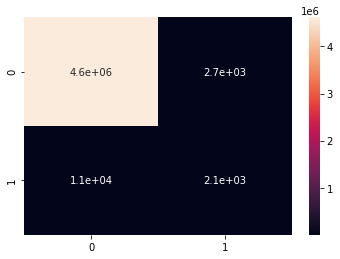

In [50]:
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

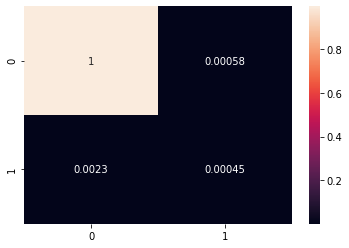

In [52]:
sns.heatmap(np.array(conf_matrix)/len(y), annot=True)

In [53]:
np.array(conf_matrix)/len(y)

array([[9.96667962e-01, 5.80742660e-04],
       [2.30030225e-03, 4.50993092e-04]])

In [47]:
np.array(conf_matrix)/len(y)

array([[9.96667962e-01, 5.80742660e-04],
       [2.30030225e-03, 4.50993092e-04]])

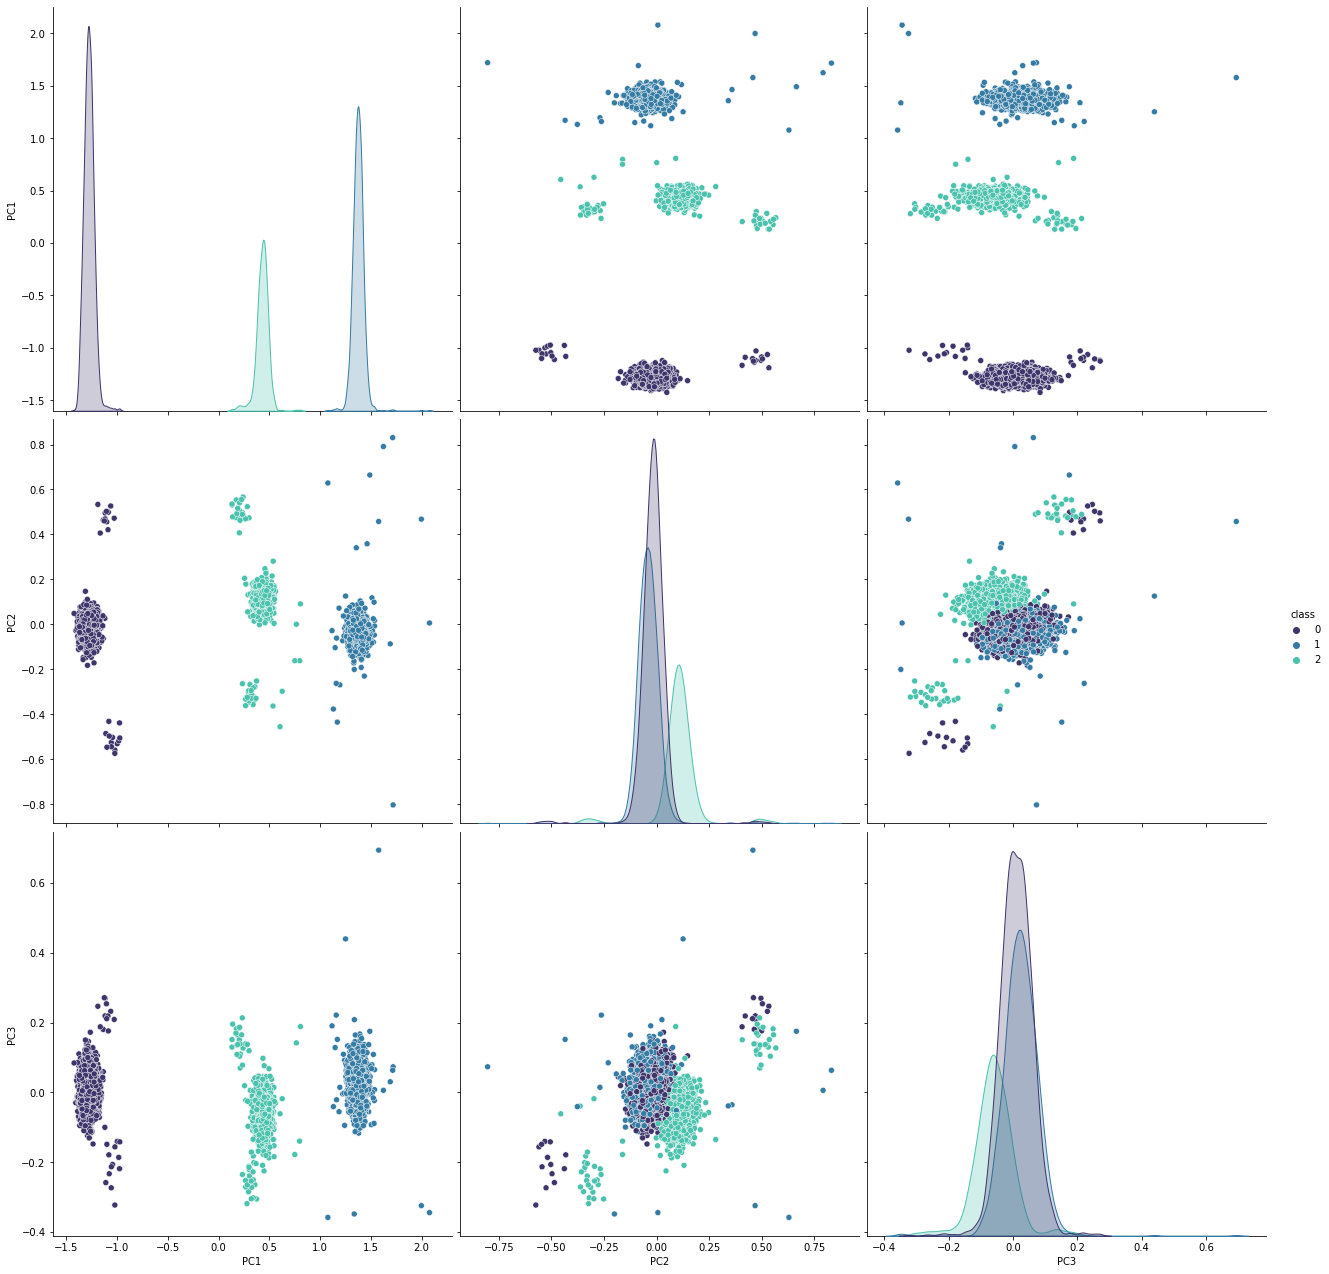

In [40]:
k=3
pca = PCA(n_components = 3)
real_spike_indexes = pca.fit_transform(real_spike_indexes)
kmeans = KMeans(n_clusters=k)
kmeans.fit(real_spike_indexes)
y_kmeans = kmeans.predict(real_spike_indexes)
df = pd.DataFrame(real_spike_indexes)
df.columns = ['PC1', 'PC2', 'PC3']
df['class']= y_kmeans
sns.pairplot(df, hue='class',  height=6, palette=sns.color_palette('mako', n_colors=k));

## New Threshold

0.9035899918929251


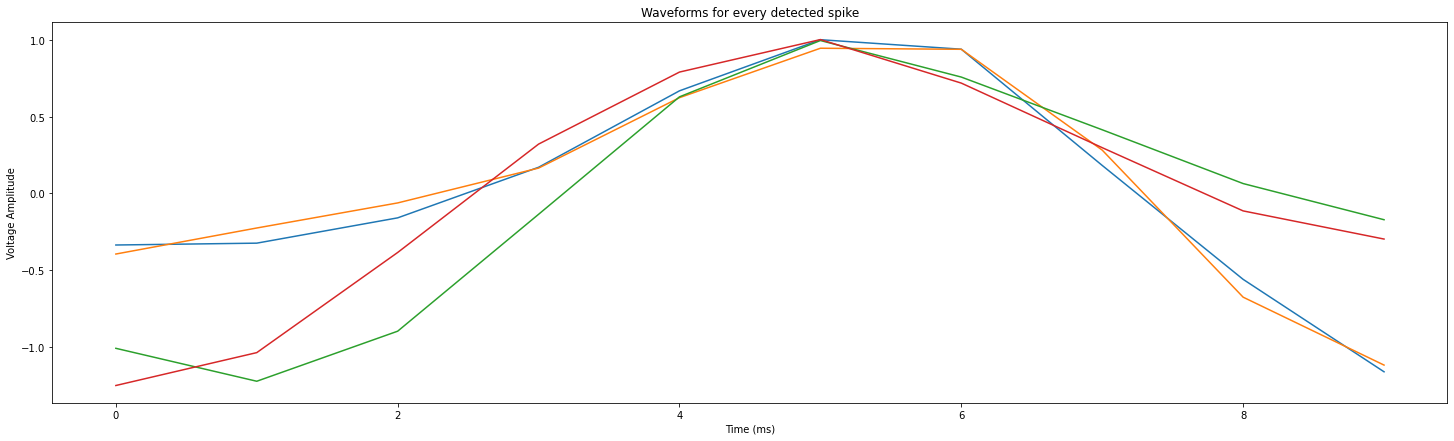

c:\dev\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\dev\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\dev\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


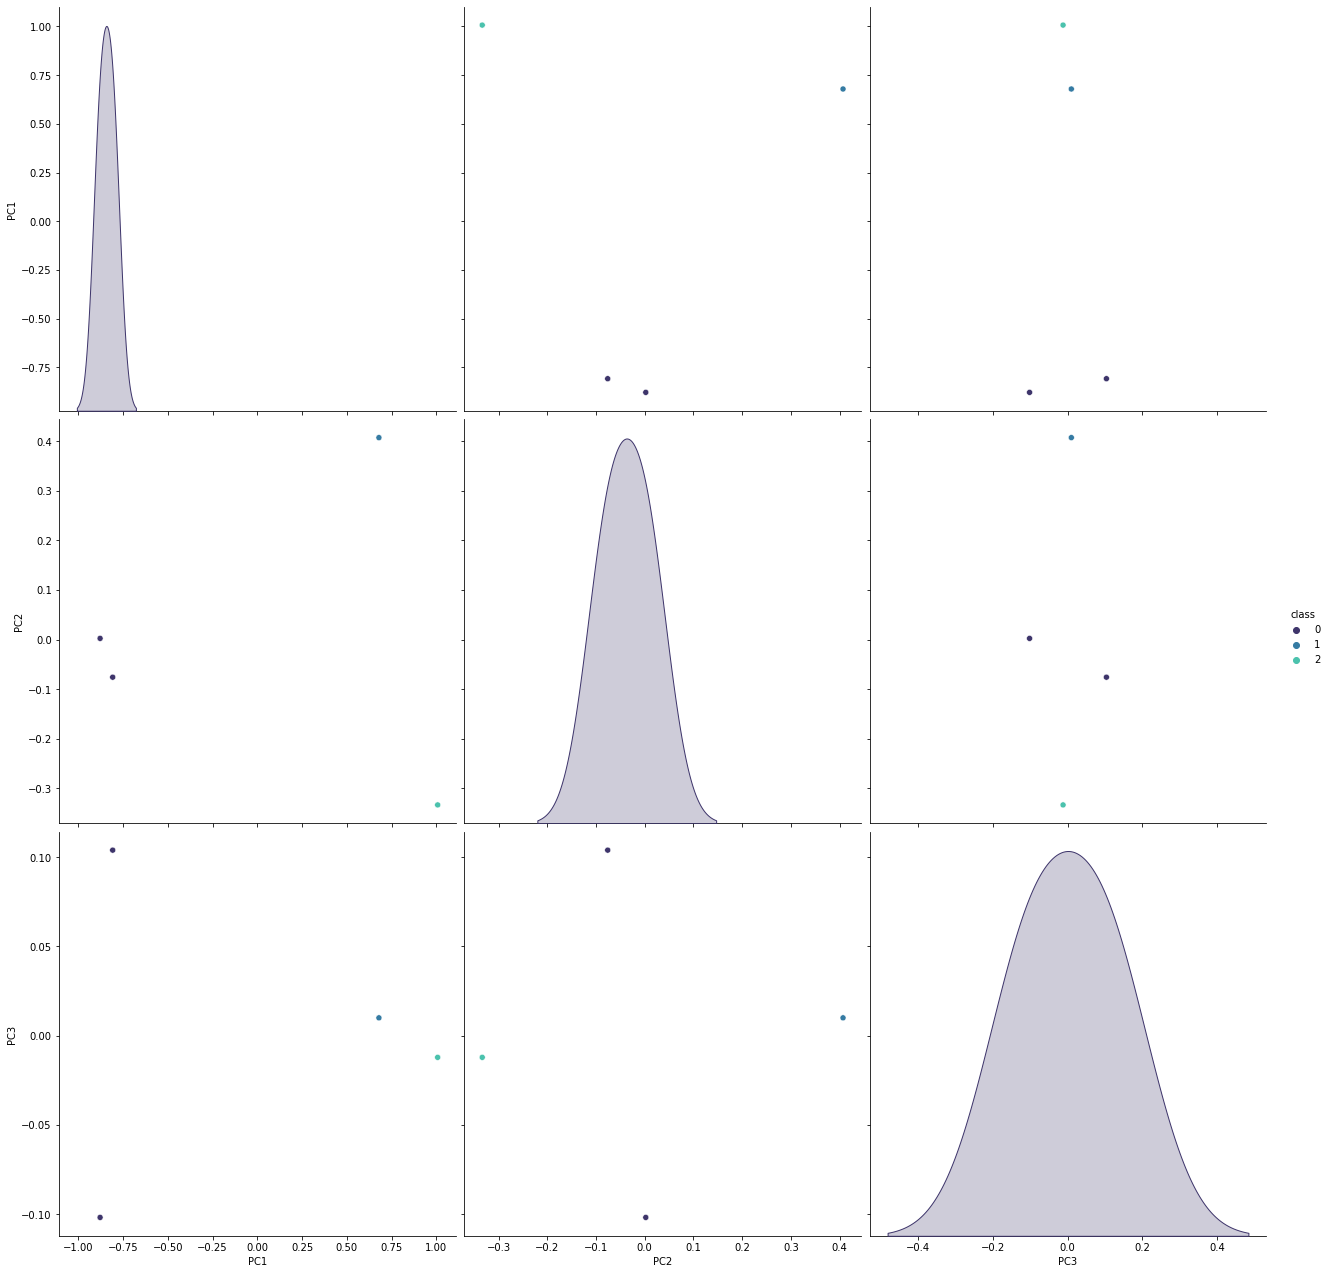

In [18]:
sigma = np.max(y)
threshold = 0.9 * sigma
print(threshold)

diff_signal = np.diff(y)
spike_indexes = []
detected_spikes = []
real_spike_indexes = []
for i in range(1, len(diff_signal)- 1):
    if np.sign(diff_signal[i-1]) * np.sign(diff_signal[i+1])<0:
        if y[i] >= threshold:
            detected_spikes.append(i+1)
            spike_indexes.append(y[i-5 : i + 5])
    
    if i in spikes_label[0]:
        real_spike_indexes.append(y[i-5 : i + 5])
        

plt.figure(figsize=(25, 7))
for spike in spike_indexes:
    plt.plot(spike)

plt.xlabel("Time (ms)")
plt.ylabel("Voltage Amplitude")
plt.title("Waveforms for every detected spike")
plt.show()

pca = PCA(n_components = 3)
spike_indexes = pca.fit_transform(spike_indexes)

kmeans = KMeans(n_clusters=3)
kmeans.fit(spike_indexes)
y_kmeans = kmeans.predict(spike_indexes)
df = pd.DataFrame(spike_indexes)
df.columns = ['PC1', 'PC2', 'PC3']
df['class']= y_kmeans
sns.pairplot(df, hue='class',  height=6, palette=sns.color_palette('mako', n_colors=3));

## Using TSNE

0.24112208411417452


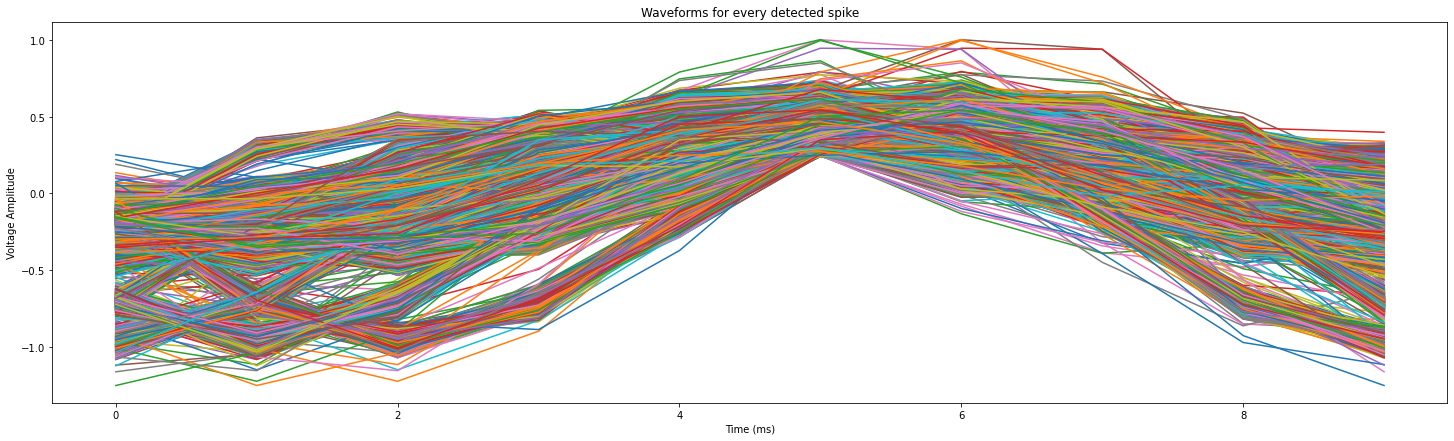

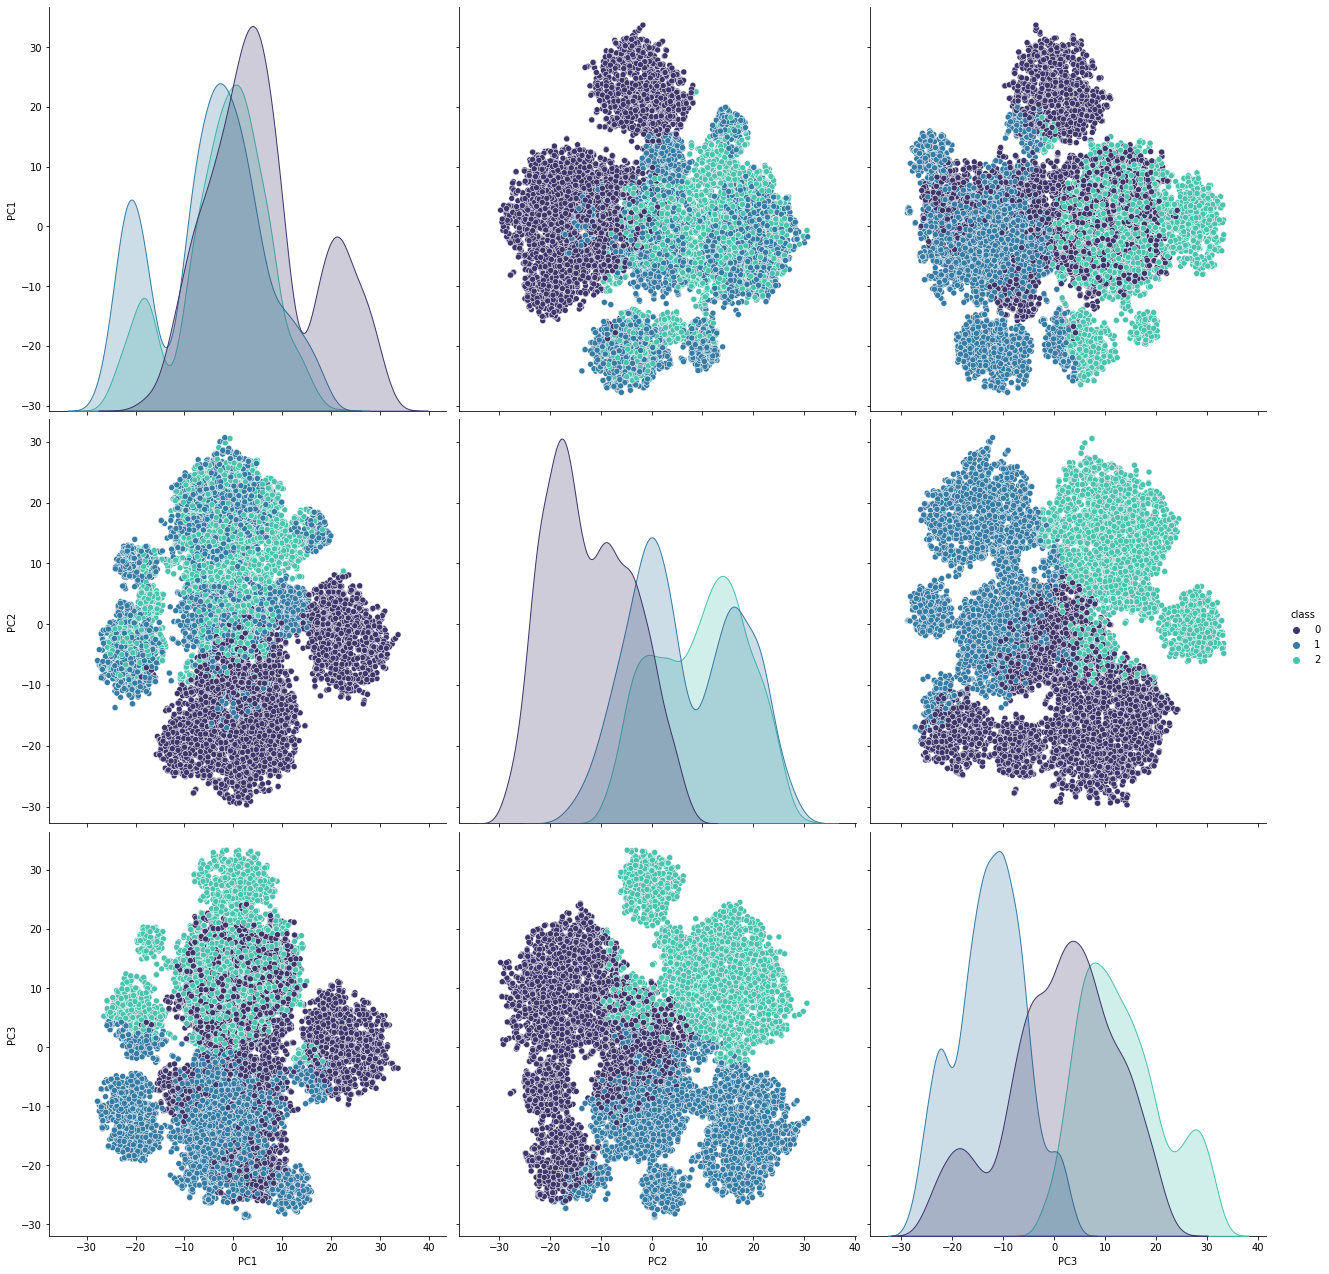

In [19]:
sigma = np.median(np.abs(y)/ 0.6745);
threshold = 5 * sigma
print(threshold)

diff_signal = np.diff(y)
spike_indexes = []
detected_spikes = []
real_spike_indexes = []
for i in range(1, len(diff_signal)- 1):
    if np.sign(diff_signal[i-1]) * np.sign(diff_signal[i+1])<0:
        if y[i] >= threshold:
            detected_spikes.append(i+1)
            spike_indexes.append(y[i-5 : i + 5])
    
    if i in spikes_label[0]:
        real_spike_indexes.append(y[i-5 : i + 5])
        

plt.figure(figsize=(25, 7))
for spike in spike_indexes:
    plt.plot(spike)

plt.xlabel("Time (ms)")
plt.ylabel("Voltage Amplitude")
plt.title("Waveforms for every detected spike")
plt.show()

tsne = TSNE(n_components = 3)
tsne_spike_indexes = tsne.fit_transform(spike_indexes)

kmeans = KMeans(n_clusters=3)
kmeans.fit(tsne_spike_indexes)
y_kmeans = kmeans.predict(tsne_spike_indexes)
df = pd.DataFrame(tsne_spike_indexes)
df.columns = ['PC1', 'PC2', 'PC3']
df['class']= y_kmeans
sns.pairplot(df, hue='class',  height=6, palette=sns.color_palette('mako', n_colors=3));